# Data Exploration for American Bankruptcy Dataset

In this notebook, we will load and perform basic exploratory data analysis on the bankruptcy dataset located at:


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For displaying all columns in the notebook output
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

# Define the file path (using a raw string to avoid backslash issues)
file_path = r"C:\Users\Sima\Final Project\american_bankruptcy.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
print("Data Shape:", df.shape)
df.head()


Data Shape: (78682, 21)


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.2670,833.1070,18.3730,89.0310,336.0180,35.1630,128.3480,372.7519,"1,024.3330",740.9980,180.4470,70.6580,191.2260,163.8160,201.0260,"1,024.3330",401.4830,935.3020
1,C_1,alive,2000,485.8560,713.8110,18.5770,64.3670,320.5900,18.5310,115.1870,377.1180,874.2550,701.8540,179.9870,45.7900,160.4440,125.3920,204.0650,874.2550,361.6420,809.8880
2,C_1,alive,2001,436.6560,526.4770,22.4960,27.2070,286.5880,-58.9390,77.5280,364.5928,638.7210,710.1990,217.6990,4.7110,112.2440,150.4640,139.6030,638.7210,399.9640,611.5140
3,C_1,alive,2002,396.4120,496.7470,27.1720,30.7450,259.9540,-12.4100,66.3220,143.3295,606.3370,686.6210,164.6580,3.5730,109.5900,203.5750,124.1060,606.3370,391.6330,575.5920
4,C_1,alive,2003,432.2040,523.3020,26.6800,47.4910,247.2450,3.5040,104.6610,308.9071,651.9580,709.2920,248.6660,20.8110,128.6560,131.2610,131.8840,651.9580,407.6080,604.4670


In [3]:
# Check the column names and data types
print("Column Names:", df.columns.tolist())
print("\nData Types:")
display(df.dtypes)


Column Names: ['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']

Data Types:


company_name     object
status_label     object
year              int64
X1              float64
X2              float64
X3              float64
X4              float64
X5              float64
X6              float64
X7              float64
X8              float64
X9              float64
X10             float64
X11             float64
X12             float64
X13             float64
X14             float64
X15             float64
X16             float64
X17             float64
X18             float64
dtype: object

In [4]:
# Check for missing values in each column
print("Missing Values per Column:")
display(df.isnull().sum())


Missing Values per Column:


company_name    0
status_label    0
year            0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18             0
dtype: int64

In [5]:
# Display summary statistics for numerical columns
print("Statistical Summary (Numerical):")
display(df.describe())


Statistical Summary (Numerical):


,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,"78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000"
mean,"2,007.5063",880.3625,"1,594.5290",121.2343,376.7594,201.6057,129.3825,286.8327,"3,414.3546","2,364.0197","2,867.1106",722.4837,255.5250,769.4908,610.0723,532.4671,"2,364.0197","1,773.5640","1,987.2603"
std,5.7428,"3,928.5648","8,930.4847",652.3768,"2,012.0231","1,060.7661","1,265.5320","1,335.9786","18,414.1036","11,950.0688","12,917.9444","3,242.1709","1,494.6435","3,774.7031","2,938.3874","6,369.1594","11,950.0688","8,053.6849","10,419.6290"
min,"1,999.0000",-7.7600,-366.6450,0.0000,"-21,913.0000",0.0000,"-98,696.0000",-0.0060,0.0001,"-1,964.9990",0.0010,-0.0230,"-25,913.0000","-21,536.0000",0.0010,"-102,362.0000","-1,964.9990",0.0010,-317.1970
25%,"2,002.0000",18.9240,17.0383,1.1920,-0.8110,0.0000,-7.4158,3.2812,34.9800,27.5485,37.3635,0.0000,-2.7870,8.5213,8.8893,-68.2827,27.5485,13.4860,32.8725
50%,"2,007.0000",100.4495,103.6610,7.9295,15.0345,7.0230,1.6160,22.8200,227.5118,186.5985,213.2035,7.5935,6.5180,63.5815,43.3330,-1.1310,186.5985,81.9880,168.9120
75%,"2,012.0000",431.5267,634.5480,47.9718,139.6552,74.7473,40.1442,131.5805,"1,244.8899","1,046.4025","1,171.3648",248.7608,87.5990,344.0743,222.8170,146.0700,"1,046.4025",629.9750,875.5222
max,"2,018.0000","169,662.0000","374,623.0000","28,430.0000","81,730.0000","62,567.0000","104,821.0000","65,812.0000","1,073,390.5400","511,729.0000","531,864.0000","166,250.0000","71,230.0000","137,106.0000","116,866.0000","402,089.0000","511,729.0000","337,980.0000","481,580.0000"


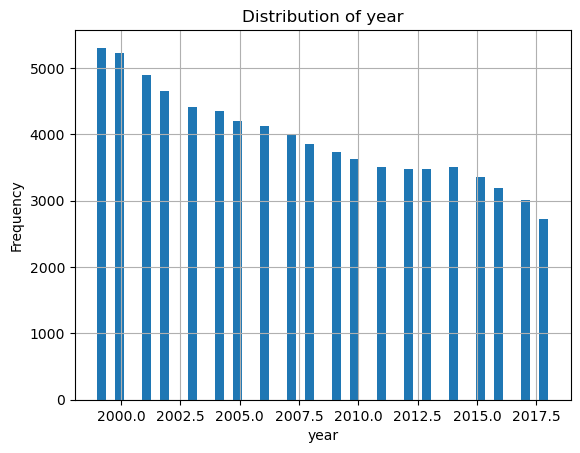

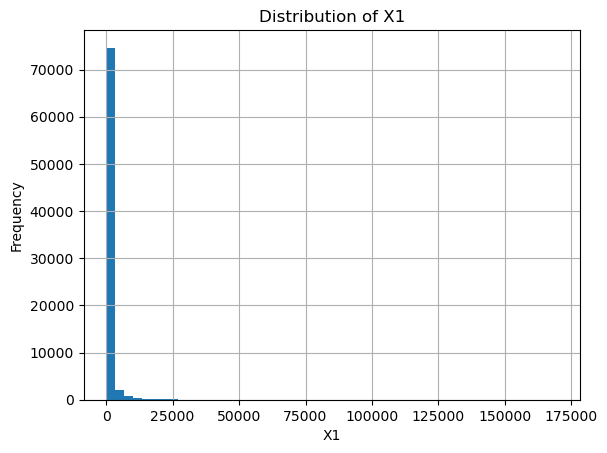

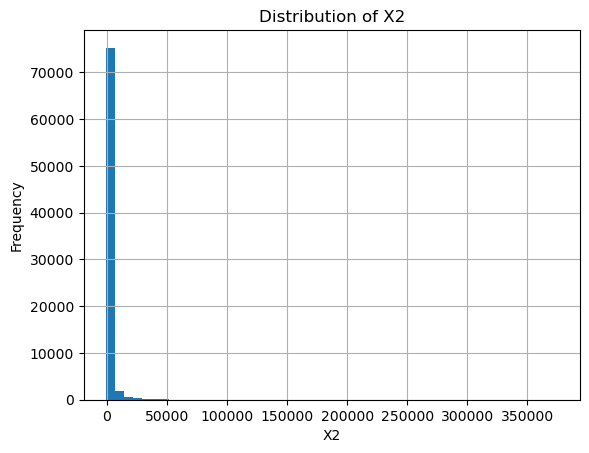

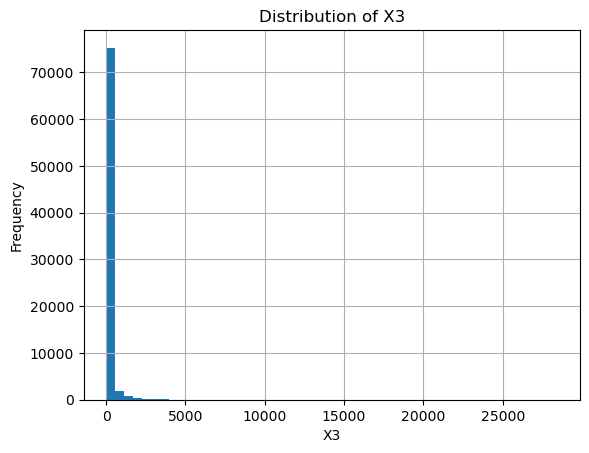

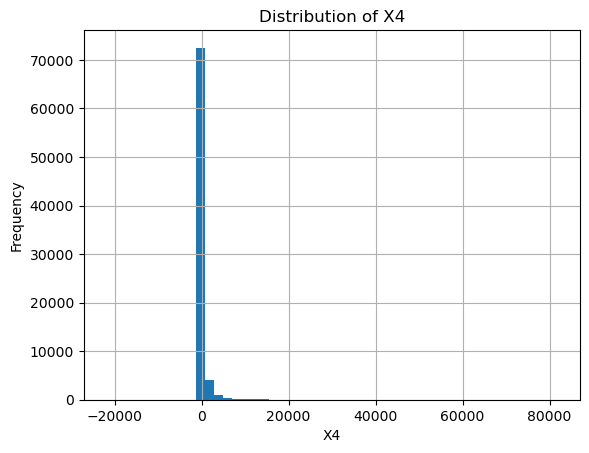

In [6]:
# Plot histograms for the first 5 numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
cols_for_hist = numeric_cols[:5]

for col in cols_for_hist:
    plt.figure()
    df[col].dropna().hist(bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
